# Intensity in a Gaussian Beam

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Set Parameters like beam waist, wavelength, pulse fwhm

In [ ]:
w0 = 1.5e-6
lbda = 8e-7
tau = 4e-15

### Rayleigh Range, Speed of Light

In [ ]:
zR = np.pi *w0**2 / lbda
c = 3e8

### Define Intensity, spot size, and envelope function

In [ ]:
def I(z, r):
    return (w0/w(z))**2 * np.exp(-2*r**2 / w(z)**2) * env(z/c)
def w(z): 
    return w0 * np.sqrt(1 + (z/zR)**2)
def env(t):
    return np.sin(np.pi * t / (2*tau) + np.pi/2)**2

### r is the radial distance away from the beam axis

### z is the on-axis distance away from focal spot

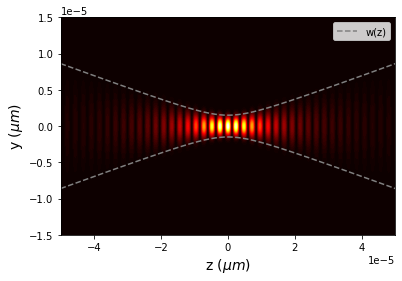

In [15]:
fig, ax = plt.subplots()
xmin = -50e-6
xmax = -xmin
ymin = -10*w0
ymax = -ymin
rs = np.linspace(ymin, ymax, 1000)
zs = np.linspace(xmin, xmax, 1000)
X, Y = np.meshgrid(zs, rs)
Z = I(X, Y)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.contourf(X, Y, I(X, Y), 100, cmap='hot')
ax.plot(zs, w(zs), color='gray', linestyle='dashed', label = 'w(z)')
ax.plot(zs, -w(zs), color = 'gray', linestyle='dashed')
ax.set_xlabel('z ($\mu m$)', fontsize=14)
ax.set_ylabel('y ($\mu m$)', fontsize=14)
ax.legend()
fig